# Community (2009 - 2015) IMDb Ratings

In this notebook I'll explore the IMDb ratings and their total votes then make a plot of them and a heatmap of all of the episode ratings throughout the series.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Community_Episodes_IMDb_Ratings.csv')
df.head()

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,2009-09-17,7.8,3187,An ex-lawyer is forced to return to community ...
1,1,2,Spanish 101,2009-09-24,7.9,2760,Jeff takes steps to ensure that Brita will be ...
2,1,3,Introduction to Film,2009-10-01,8.3,2696,Brita comes between Abed and his father when s...
3,1,4,Social Psychology,2009-10-08,8.2,2473,Jeff and Shirley bond by making fun of Britta'...
4,1,5,Advanced Criminal Law,2009-10-15,7.9,2375,Señor Chang is on the hunt for a cheater and t...


Make the `season` and `episode number` columns strings:

In [3]:
df[['season','episode_number']] = df[['season','episode_number']].astype(str)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          110 non-null    object 
 1   episode_number  110 non-null    object 
 2   title           110 non-null    object 
 3   airdate         110 non-null    object 
 4   rating          110 non-null    float64
 5   total_votes     110 non-null    int64  
 6   desc            110 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.1+ KB


### Stats of the ratings and total votes of all the episodes for the ratings

In [5]:
df.describe()

,rating,total_votes
count,110.000000,110.000000
mean,8.339091,2342.472727
std,0.651898,933.883130
min,6.800000,1363.000000
25%,7.900000,1853.250000
50%,8.200000,2149.000000
75%,8.800000,2481.250000
max,9.800000,8209.000000


### Stats per season

In [6]:
df.groupby('season').describe()

rating                                                  total_votes  \
        count      mean       std  min    25%  50%    75%  max       count   
season                                                                       
1        25.0  8.336000  0.499066  7.8  8.000  8.2  8.500  9.8        25.0   
2        24.0  8.591667  0.656020  7.4  8.075  8.6  9.100  9.7        24.0   
3        22.0  8.627273  0.593763  7.7  8.125  8.6  9.075  9.8        22.0   
4        13.0  7.515385  0.403828  6.8  7.300  7.5  7.800  8.2        13.0   
5        13.0  8.469231  0.525015  7.9  8.000  8.3  9.000  9.4        13.0   
6        13.0  8.084615  0.614880  7.5  7.800  7.8  8.100  9.6        13.0   

                                                                           
               mean          std     min      25%     50%     75%     max  
season                                                                     
1       2666.400000  1202.196913  2068.0  2232.00  2303.0  2697.0  8209.0  
2       2649.833333   755.183690  1934.0  2082.75  2354.0  2921.5  4656.0  
3       2533.318182  1074.727269  1869.0  1993.00  2135.0  2490.0  6862.0  
4       1851.000000   165.579286  1682.0  1757.00  1826.0  1889.0  2313.0  
5       2005.461538   439.961100  1458.0  1655.00  1848.0  2268.0  2911.0  
6       1657.615385   573.441880  1363.0  1378.00  1489.0  1594.0  3499.0

### Lowest rated episodes

In [7]:
df.sort_values('rating').head(10)

,season,episode_number,title,airdate,rating,total_votes,desc
77,4,7,Economics of Marine Biology,2013-03-21,6.8,1719,"Dean Pelton and Annie try to land a ""whale"" st..."
79,4,9,Intro to Felt Surrogacy,2013-04-11,7.0,1987,Dean Pelton prompts the study group to use pup...
74,4,4,Alternative History of the German Invasion,2013-02-28,7.1,1757,The Study Group loses access to the study room...
73,4,3,Conventions of Space and Time,2013-02-21,7.3,1889,"At the Inspector SpaceTime Convention, Abed fi..."
71,4,1,History 101,2013-02-07,7.4,2313,While the Dean creates a Hunger Games-style co...
42,2,18,Custody Law and Eastern European Diplomacy,2011-03-17,7.4,1973,Jeff uses Shirley's parental rights waiver aga...
103,6,7,Advanced Safety Features,2015-04-21,7.5,1366,An ex-boyfriend persuades Britta to join a gue...
75,4,5,Cooperative Escapism in Familial Relations,2013-03-07,7.5,1785,While Jeff and Britta spend Thanksgiving with ...
76,4,6,Advanced Documentary Filmmaking,2013-03-14,7.5,1712,Abed makes a new documentary chronicling Green...
106,6,10,Basic RV Repair and Palmistry,2015-05-12,7.6,1363,While on a road trip to get rid of a Greendale...


### Highest rated episodes

In [8]:
df.sort_values('rating',ascending=False).head(10)

,season,episode_number,title,airdate,rating,total_votes,desc
52,3,4,Remedial Chaos Theory,2011-10-13,9.8,6862,"At Abed and Troy's housewarming party, Jeff de..."
22,1,23,Modern Warfare,2010-05-06,9.8,8209,Greendale Community College is transformed int...
47,2,23,A Fistful of Paintballs,2011-05-05,9.7,4656,"In a ""spaghetti western"" parody, Pierce tries ..."
109,6,13,Emotional Consequences of Broadcast Television,2015-06-02,9.6,3499,As their sixth year at Greendale draws to a cl...
48,2,24,For a Few Paintballs More,2011-05-12,9.6,3786,When the study group learns that there's a sin...
68,3,20,Digital Estate Planning,2012-05-17,9.5,3516,The Study Group must help Hawthorne win a vide...
38,2,14,Advanced Dungeons & Dragons,2011-02-03,9.5,4085,The study group plays Dungeons & Dragons with ...
65,3,17,Basic Lupine Urology,2012-04-26,9.5,3247,Presented like an episode of Law & Order (1990...
33,2,9,Conspiracy Theories and Interior Design,2010-11-18,9.4,3521,Dean Pelton tries to bust Jeff for a phony nig...
88,5,5,Geothermal Escapism,2014-01-23,9.4,2911,As a going-away present to Troy before his aro...


### Average ratings per season

In [9]:
df.groupby('season').mean()['rating']

season
1    8.336000
2    8.591667
3    8.627273
4    7.515385
5    8.469231
6    8.084615
Name: rating, dtype: float64

# Ratings plotted against their total votes

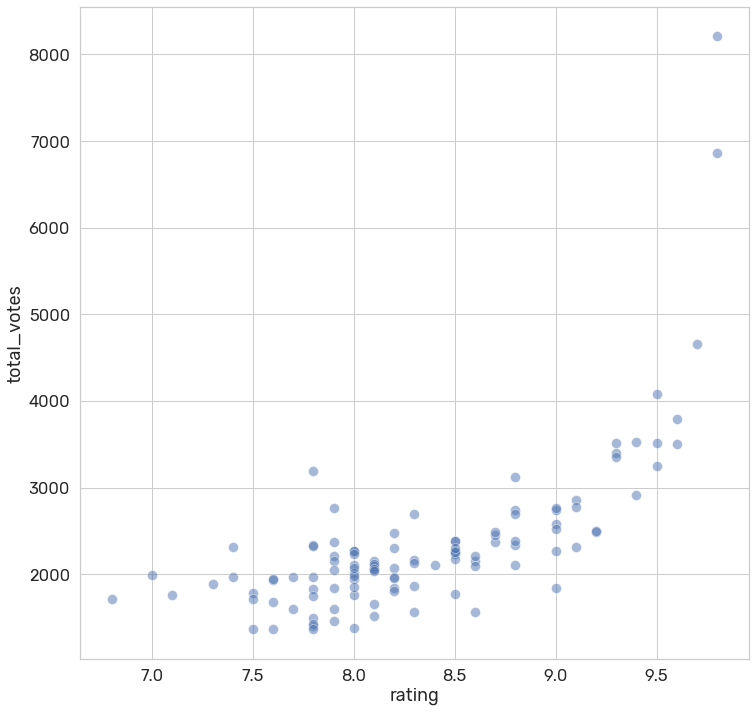

In [122]:
sns.set(font_scale=1.5,font='Rubik',style='whitegrid')
plt.figure(figsize=(12,12))
sns.scatterplot(df.rating,df.total_votes,alpha=0.5,s=100)

It looks like generally, the higher the rating, the more people placed a vote for that episode. Which makes sense, because when you like something you tend to want to express/share it.

# Heatmap of the ratings per episode
Before we can make the heat map, we have to prepare the data and put it in the right table format.

First, I'll add the 0s before each single digit so that we can properly order the episodes in the heatmap.

In [11]:
df['episode_number'] = df['episode_number'].apply(lambda num: num.zfill(2))

Now the data is ready to be put into a pivot table that will be our data input for the heatmap. Our index will be the seasons, the episode numbers the columns, and the IMDb ratings the values in the pivot table.

In [12]:
df_heat = pd.pivot_table(data=df,index=['season'],columns=['episode_number'],values=['rating'])

### Preparing the tick labels for the heatmap
We'll get the episode numbers as strings and put them into a list and assign them as our x-axis tick values using `set_xticklabels()`.

In [13]:
episodenum = [*range(1,26)]
episodenum = [str(x) for x in episodenum]
episodenum

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25']

We'll also get the seasons as strings and put them into a list and assign them as our y-axis tick values using `set_yticklabels()`.

In [14]:
seasonticks = [*range(1,7)]
seasonticks = ['Season '+str(x) for x in seasonticks]
seasonticks

['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5', 'Season 6']

### Create the plot
Setting the plot font and style:

In [50]:
sns.set(font_scale=3,font='Rubik',style='whitegrid')

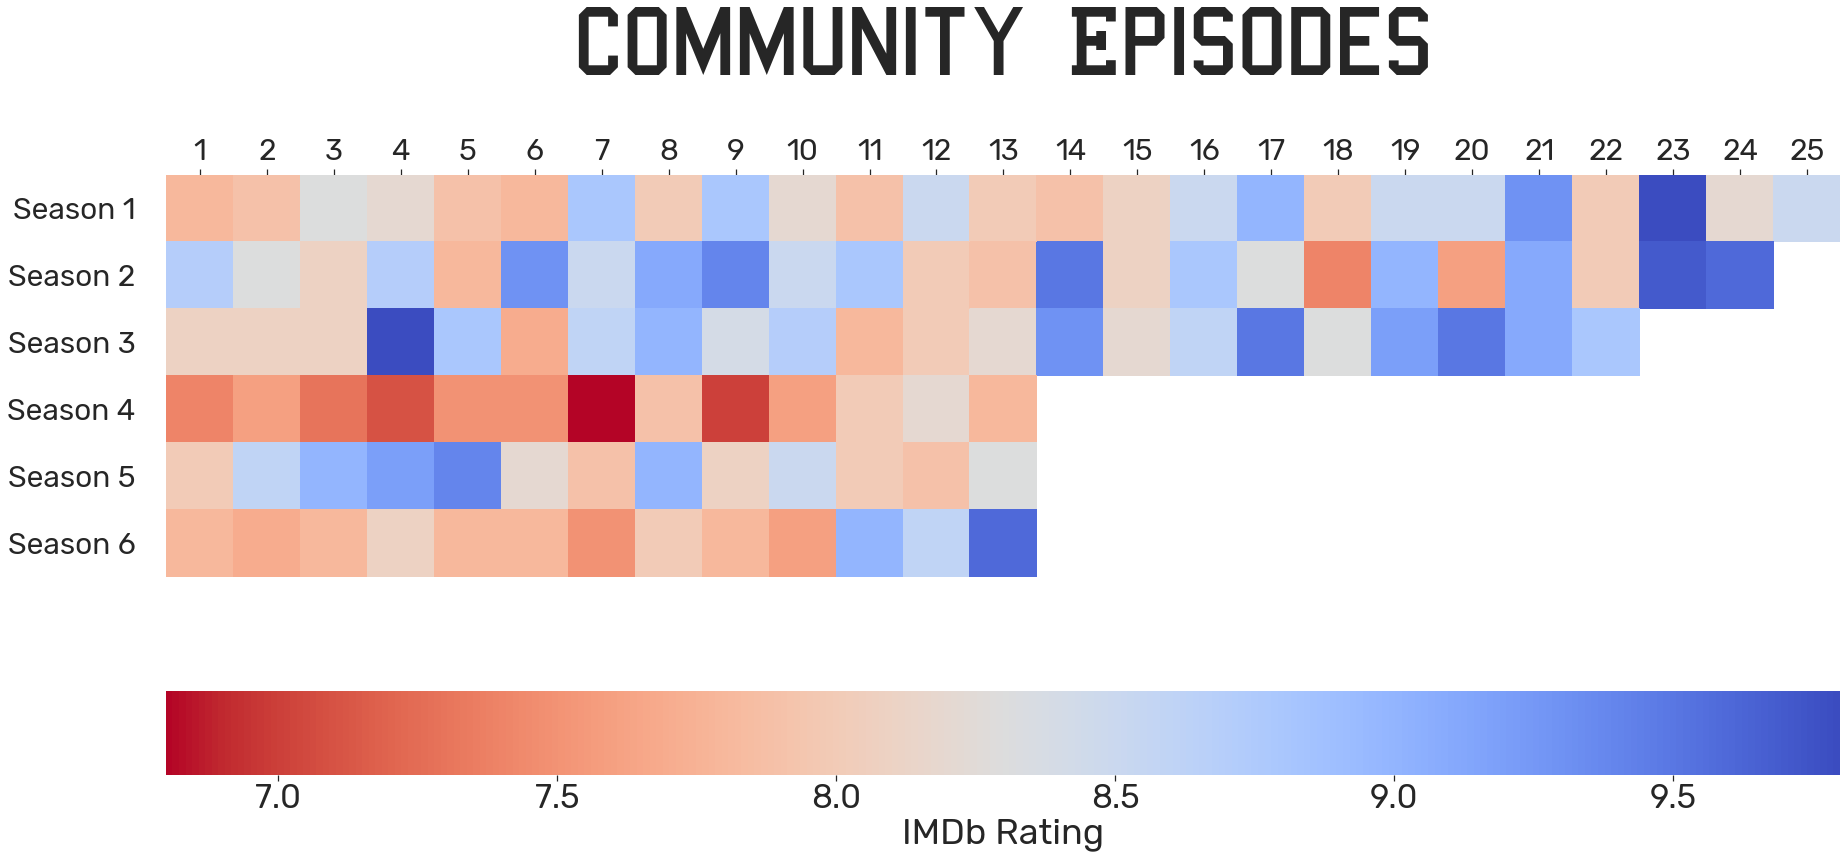

In [110]:
plt.figure(figsize=(30,14))
fg = sns.heatmap(df_heat,cmap='coolwarm_r', cbar_kws={'orientation': 'horizontal', 'label': 'IMDb Rating'}, square=True)

# Moving the x-axis ticks and to the top
fg.xaxis.tick_top()
fg.set_xticklabels(episodenum,fontsize=30)
fg.set_yticklabels(seasonticks, rotation=360, horizontalalignment='right',fontsize=30)
# Adding more space between the y tick labels and the heatmap
fg.tick_params(axis='y', which='major', pad=25)
fg.set_ylabel('')    
fg.set_xlabel('')
fg.set_title('Community Episodes',fontname='College',fontsize=100,pad=100)

plt.show()

### Save the plot

In [101]:
fig = fg.get_figure()
fig.savefig('Episode Ratings Heatmap.png',dpi=200)